### Predict Weather

#### import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Data

In [2]:
dataset = pd.read_csv("../Weather.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_4452\1773315174.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("../Weather.csv")


In [3]:
print(dataset.keys())

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')


In [4]:
print(dataset.head())

     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 N

In [5]:
print(dataset.shape)

(119040, 31)


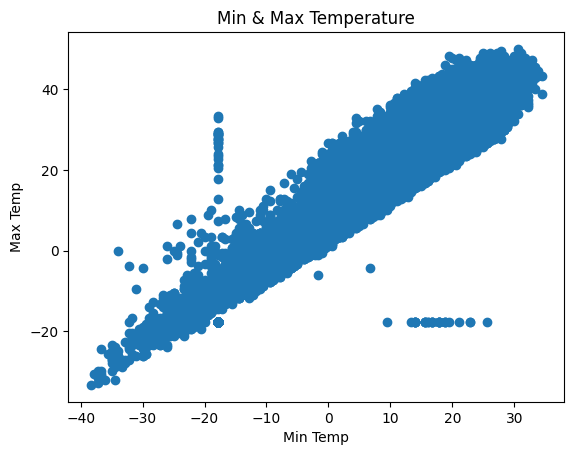

In [6]:
# dataset.plot(x = 'MinTemp', y = 'MaxTemp')
plt.scatter(dataset["MinTemp"], dataset["MaxTemp"])
plt.title("Min & Max Temperature")
plt.xlabel("Min Temp")
plt.ylabel("Max Temp")
plt.show()

In [7]:
print(dataset.describe())

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

#### Training & Testing

In [8]:
x = dataset["MinTemp"].values.reshape(-1, 1)
y = dataset["MaxTemp"].values.reshape(-1, 1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Training

In [10]:
model = LinearRegression()

In [11]:
model.fit(x_train, y_train)

LinearRegression()

#### Testing

In [12]:
y_pred = model.predict(x_test)

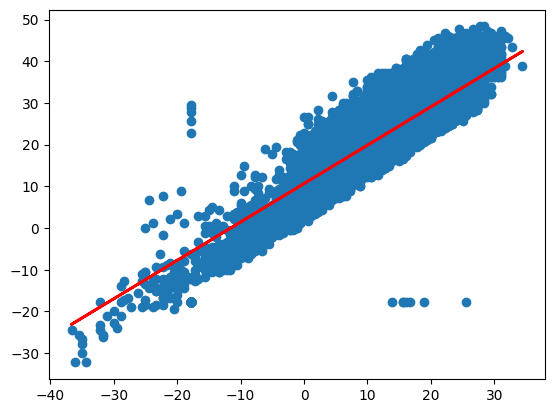

In [13]:
plt.scatter(x_test, y_test)
plt.plot(x_test,y_pred, color="red", linewidth=2)
plt.show()

#### compare true data & predict data

In [14]:
print(y_test.shape)
print(y_test.flatten().shape)

(23808, 1)
(23808,)


In [15]:
df = pd.DataFrame({"Actually": y_test.flatten(), "Predicted": y_pred.flatten()})

In [16]:
print(df.head())

    Actually  Predicted
0  28.888889  33.670351
1  31.111111  30.091251
2  27.222222  26.512151
3  28.888889  31.113851
4  23.333333  15.774852


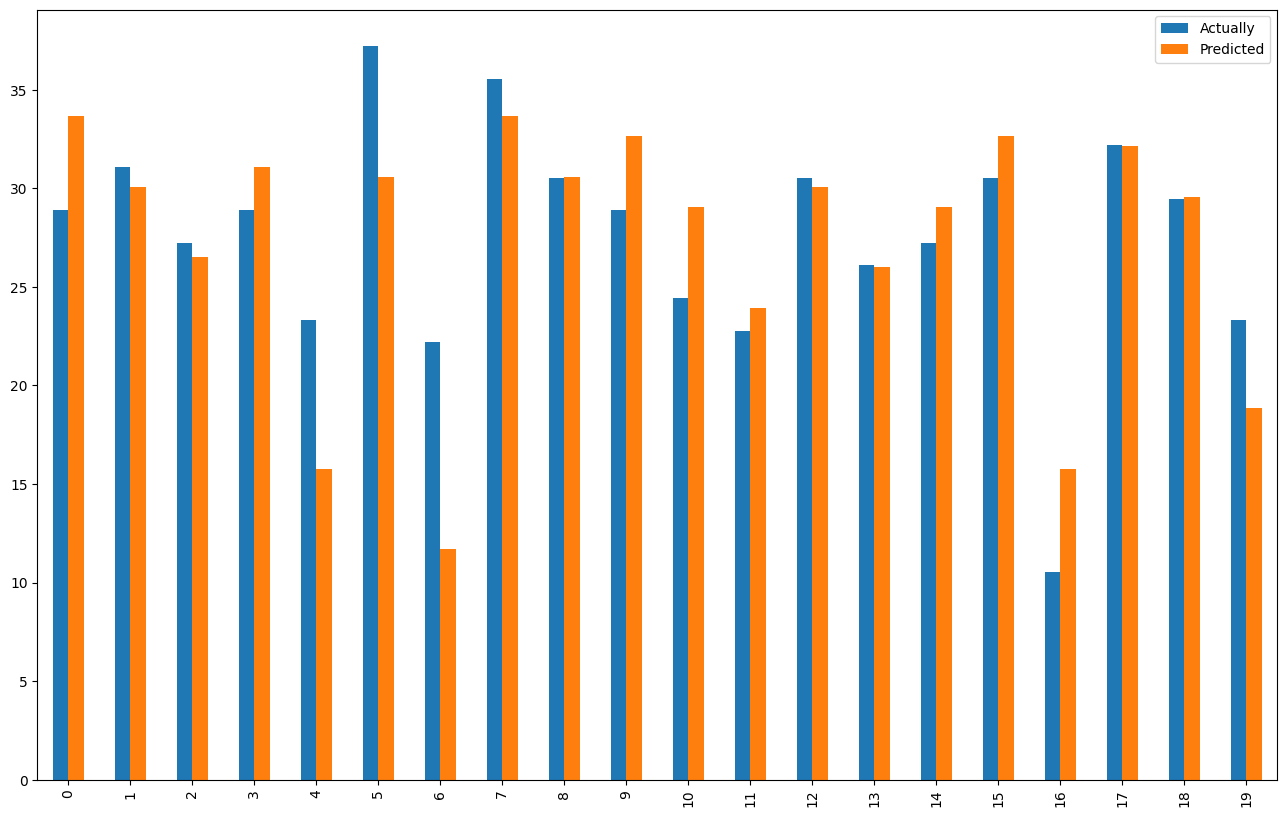

In [17]:
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

#### Matrices

In [18]:
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))
print("MSE =", metrics.mean_squared_error(y_test, y_pred))
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 =", metrics.r2_score(y_test, y_pred))

MAE = 3.1993291783785835
MSE = 17.631568097568532
RMSE = 4.198996082109215
R^2 = 0.7670218843587753
